In [2]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 4.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 4.7 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 6.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 6.6 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 6.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 4.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.0 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.3 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.5 MB/s  0:00:00
   -----------------------------------

Задание 1 (1 балл)
Сгенерируйте массив нормально распределенных значений размерности 2 из 100 точек (выберите среднее значение 
μ
 и среднее квадратическое отклонение 
σ
 по своему выбору). Проверьте правило трех сигм: нарисуйте окружность с центром в точке 
μ
 с таким радиусом, чтобы на нее приходилось 0,99 всех точек, а также окружность радиусом 3 сигмы. Выделите точку 
μ
 отдельным цветом.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


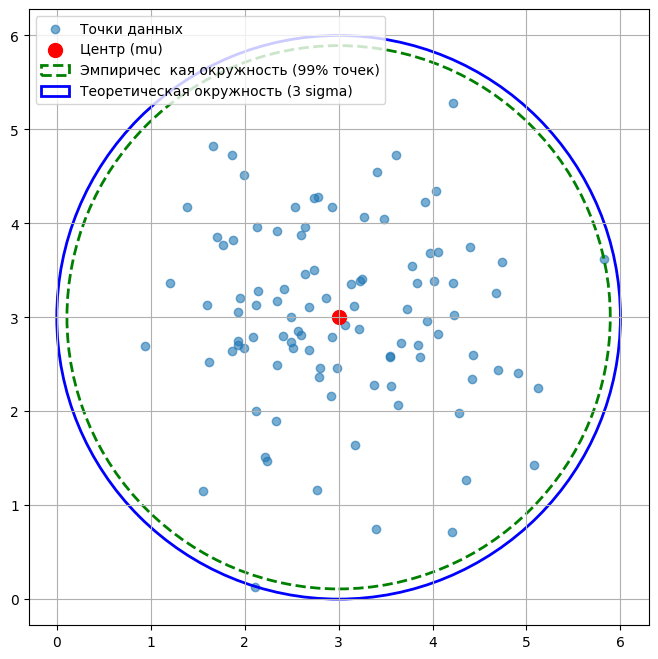

In [8]:

mu = np.array([3, 3])
sigma = 1
n_points = 100

points = np.random.normal(mu, sigma, (n_points, 2))

distances = np.linalg.norm(points - mu, axis=1)

rad_empirical = np.percentile(distances, 99)

rad_theoretical = 3 * sigma
 
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], alpha=0.6, label='Точки данных')
plt.scatter(mu[0], mu[1], color='red', s=100, label='Центр (mu)')

circle_empirical = plt.Circle(mu, rad_empirical, color='green', fill=False, linestyle='--', linewidth=2, label='Эмпиричес  кая окружность (99% точек)')
plt.gca().add_patch(circle_empirical)

circle_theoretical = plt.Circle(mu, rad_theoretical, color='blue', fill=False, linestyle='-', linewidth=2, label='Теоретическая окружность (3 sigma)')
plt.gca().add_patch(circle_theoretical)

plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

Задание 2 (1 балл)
Используйте вспомогательный график, чтобы нарисовать гистограммы с 10 сегментами для каждого измерения и построить график плотности вдоль гистограммы для данных из первого задания.

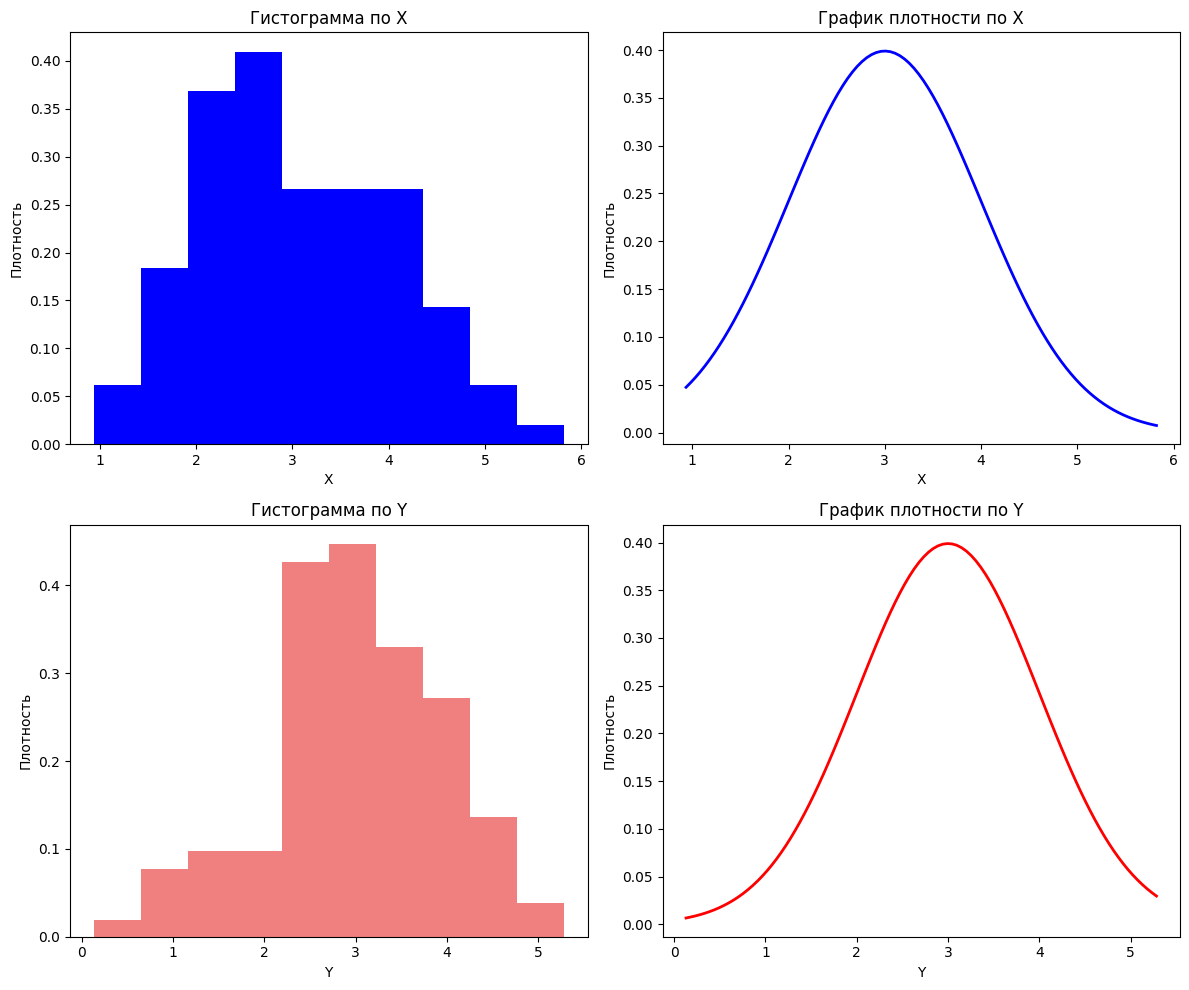

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].hist(points[:, 0], bins=10, density=True, color='blue')
axes[0,0].set_title('Гистограмма по X')
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('Плотность')

x_range = np.linspace(points[:, 0].min(), points[:, 0].max(), 100)
pdf_x = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x_range-mu[0])/sigma)**2)

axes[0,1].plot(x_range, pdf_x, 'b-', linewidth=2)
axes[0,1].set_title('График плотности по X')
axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('Плотность')

axes[1,0].hist(points[:, 1], bins=10, density=True, color='lightcoral')
axes[1,0].set_title('Гистограмма по Y')
axes[1,0].set_xlabel('Y')
axes[1,0].set_ylabel('Плотность')

y_range = np.linspace(points[:, 1].min(), points[:, 1].max(), 100)
pdf_y = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((y_range-mu[1])/sigma)**2)
axes[1,1].plot(y_range, pdf_y, 'r-', linewidth=2)
axes[1,1].set_title('График плотности по Y')
axes[1,1].set_xlabel('Y')
axes[1,1].set_ylabel('Плотность')

plt.tight_layout()
plt.show()

In [9]:
!pip install scikit-learn



In [10]:
!pip install pandas


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 2.9 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 3.1 MB/s eta 0:00:04
   ---- -----

In [14]:
!pip install seaborn

Task 3(2 балла)
Загрузите набор данных "Ирисы Фишера". Создайте тепловую карту с корреляциями между объектами, 
строки и столбцы которой должны быть подписаны названиями объектов. Важно использовать 
matplotlib. Прямая корреляция должна отображаться зеленым цветом, обратная красным, а 
отсутствие корреляции белым. Сделайте график достаточно крупным.

Подсказка: используйте plt.xticks, plt.yticks, plt.imshow, plt.colorbar

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap


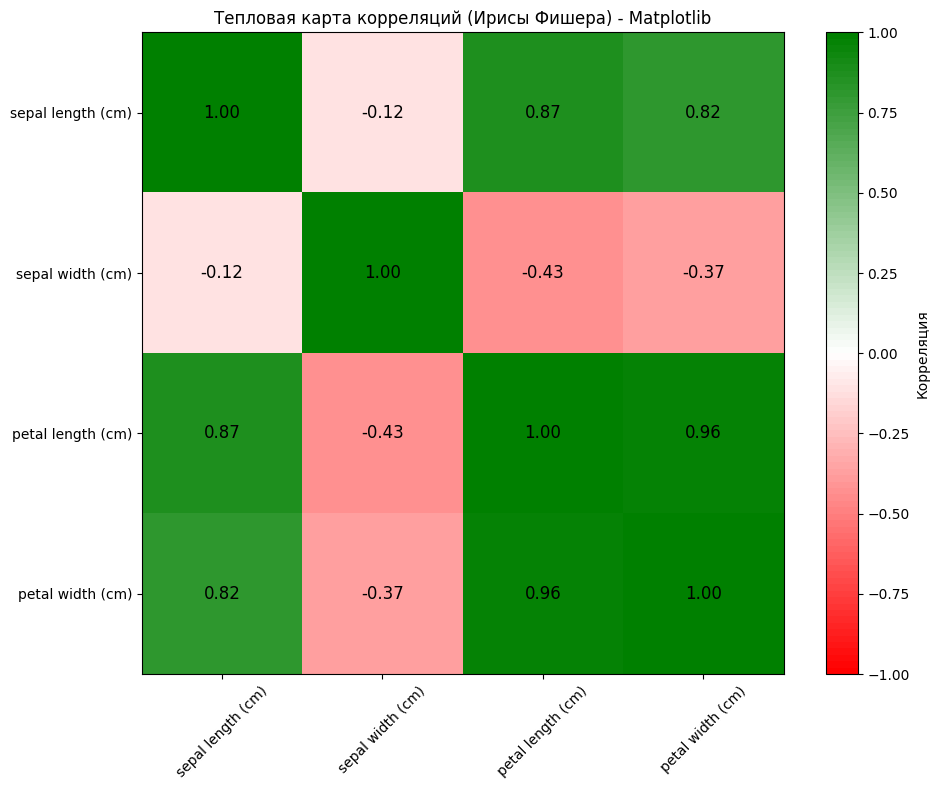

In [10]:

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

colors = ['red', 'white', 'green']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

im = plt.imshow(corr_matrix, cmap=cmap, vmin=-1, vmax=1)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

cbar = plt.colorbar(im)
cbar.set_label('Корреляция')

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', fontsize=12)

plt.title('Тепловая карта корреляций (Ирисы Фишера) - Matplotlib')
plt.tight_layout()
plt.show()

Задание 4 (1 балл)
Cоздайте такую же тепловую карту, используя seaborn.heatmap

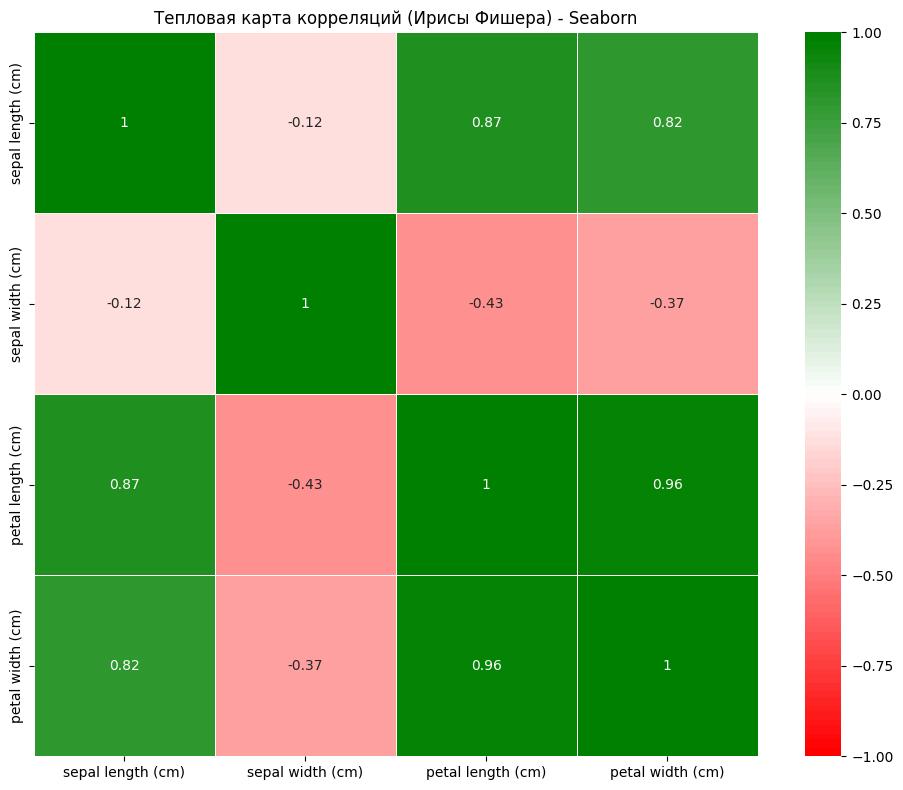

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 8))

colors = ['red', 'white', 'green']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

sns.heatmap(corr_matrix,
            annot=True,
            cmap=cmap,
            vmin=-1, vmax=1,
            center=0,
            square=True,
            linewidths=0.5)

plt.title('Тепловая карта корреляций (Ирисы Фишера) - Seaborn')
plt.tight_layout()
plt.show()